# 

In [61]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#READ  DATASET
df = pd.read_csv('train.csv');

In [63]:
#DATASET HEAD
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
#GET DATASET INFO
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [65]:
#MORE DETAILS OF THE DATASET WITH DESCRIBE METHOD
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [66]:
#CHECK THE NUMBER OF NULLS IN THE DATASET 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

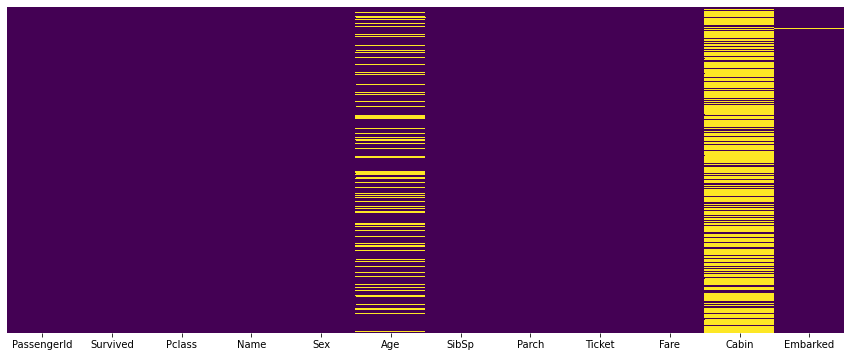

In [67]:
#VISUALIZATION OF NULLS IN THE DATASET WITH HEATMAP
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [92]:
#GET THE MEAN OF THE AGE
df.Age.mean

<bound method Series.mean of 0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [68]:
#FILL NULLS IN AGE OF THE DATASET WITH THE MEAN VALUE OF AGE (22)
df['Age']=df['Age'].replace(np.nan, 22).astype(float)

In [69]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

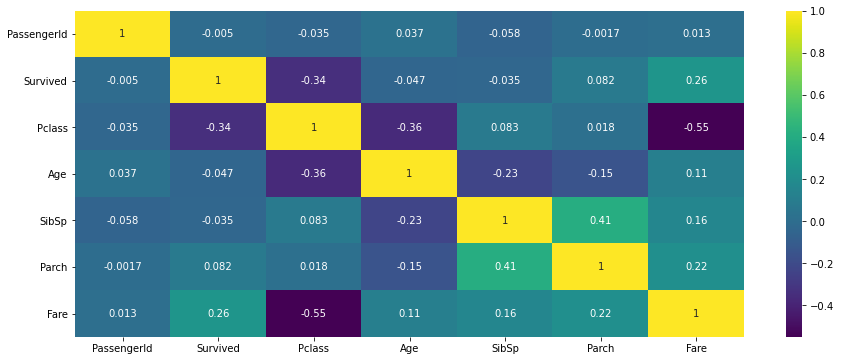

In [70]:
#PLOT CORRELATION MATRICS
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

In [71]:
#DROP THE COLUMNS WHICH ARE NOT THAT IMPORTANT
df.drop(columns=['Cabin','PassengerId','Name','Ticket'],inplace=True)

In [72]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:>

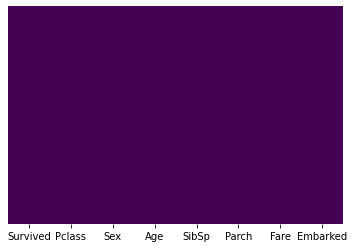

In [73]:
#CHECK THE NUMBER OF NULLS IN THE DATASET 
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [74]:
#ENCODE CATEGORICAL DATA 
from sklearn.preprocessing  import LabelEncoder 
le =  LabelEncoder();

df['Sex'] = le.fit_transform(df['Sex']);
df['Embarked'] = le.fit_transform(df['Embarked'].astype(str));  



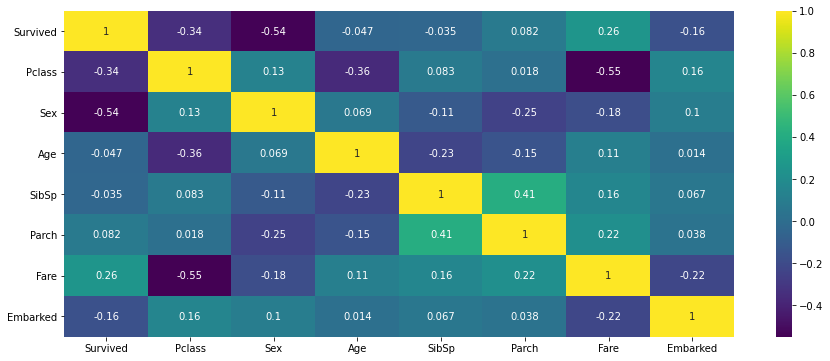

In [75]:
#PLOT CORRELATION MATRICS  AGAIN
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),cmap="viridis",annot=True);

# Sex has highest correlation with Survived

In [76]:
#FEATURES
x = df.drop('Survived',axis=1)
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [77]:
#TARGET
y= df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

<Figure size 864x360 with 0 Axes>

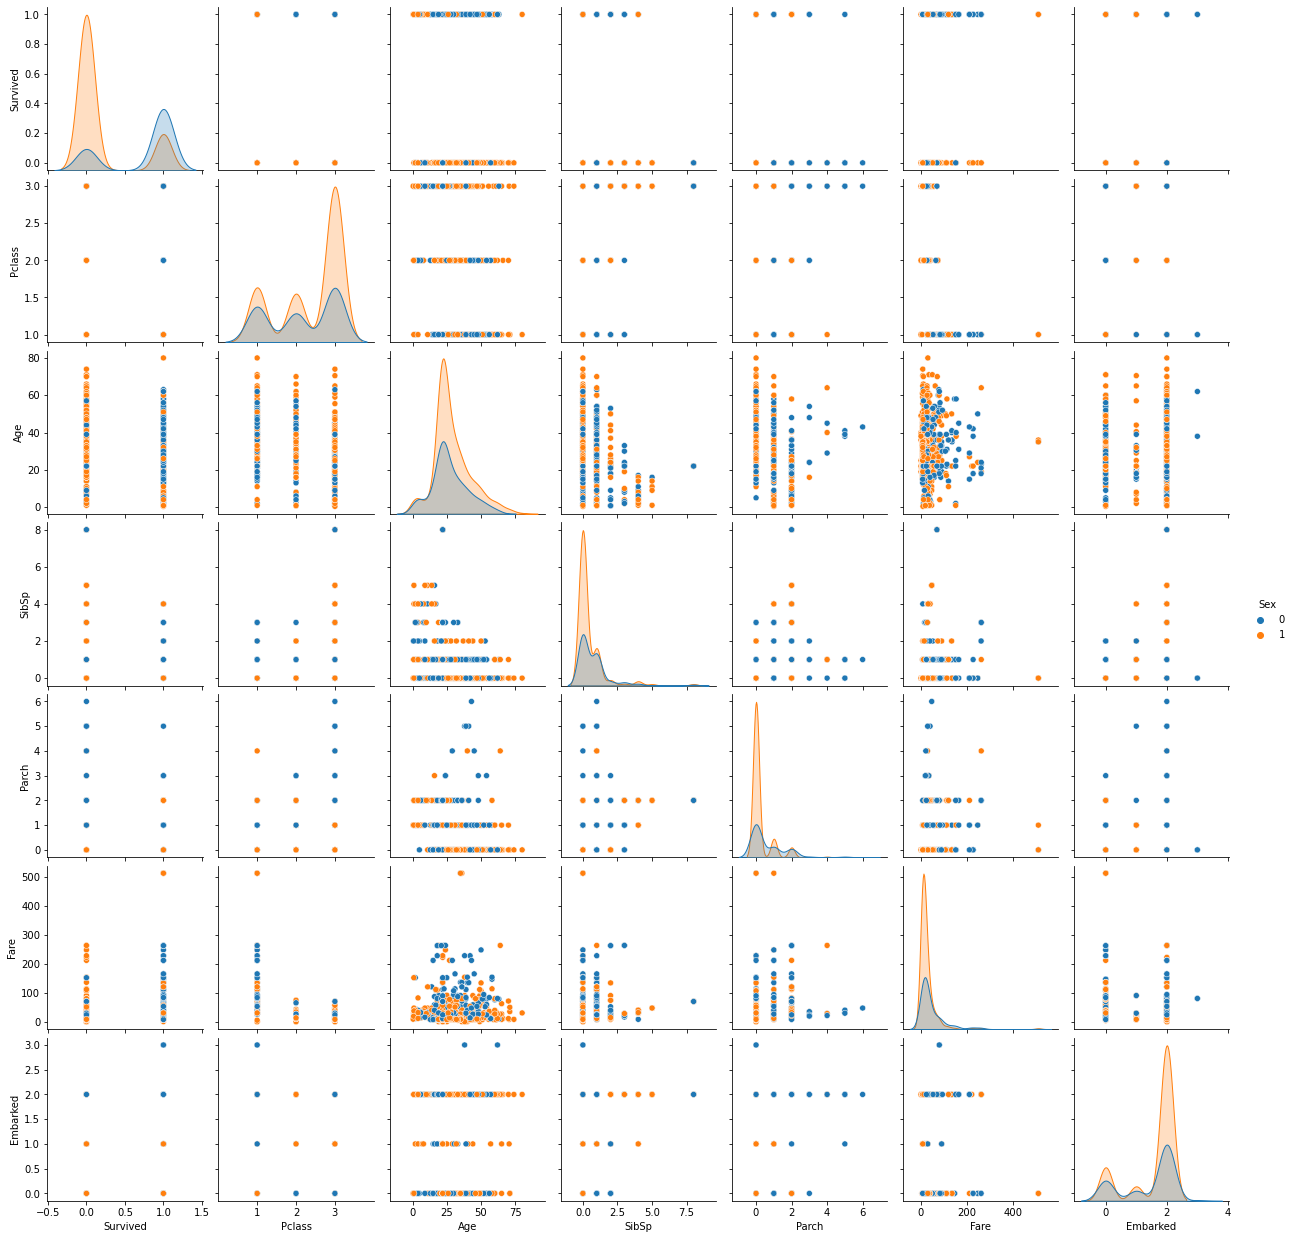

In [78]:
#PLOT PAIRPLOT WITH SEX AS A DISTINCTION FACTOR
plt.figure(figsize=(12,5))
sns.pairplot(data =df,  kind='scatter',hue='Sex',)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

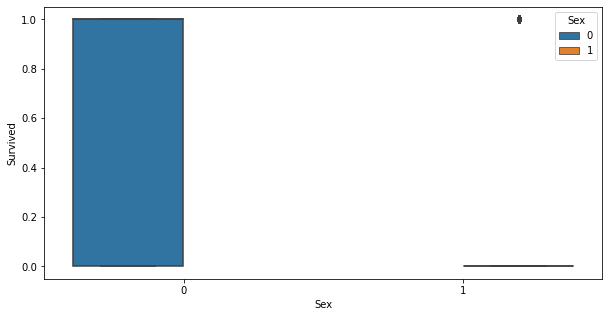

In [102]:
#BOX PLOT OF SEX VS SURVIVED
plt.figure(figsize=(10,5))
sns.boxplot(x='Sex',y='Survived',data=df,hue='Sex')


<AxesSubplot:xlabel='Survived', ylabel='count'>

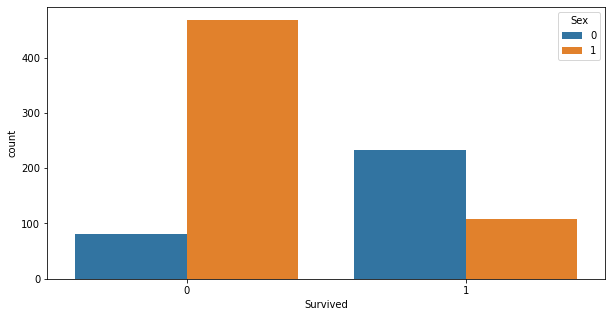

In [80]:
#COUNT PLOT OF SURVIVED WITH RESPECT TO SEX
plt.figure(figsize=(10,5))
sns.countplot(x='Survived',data=df,hue='Sex')

C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='Age'>

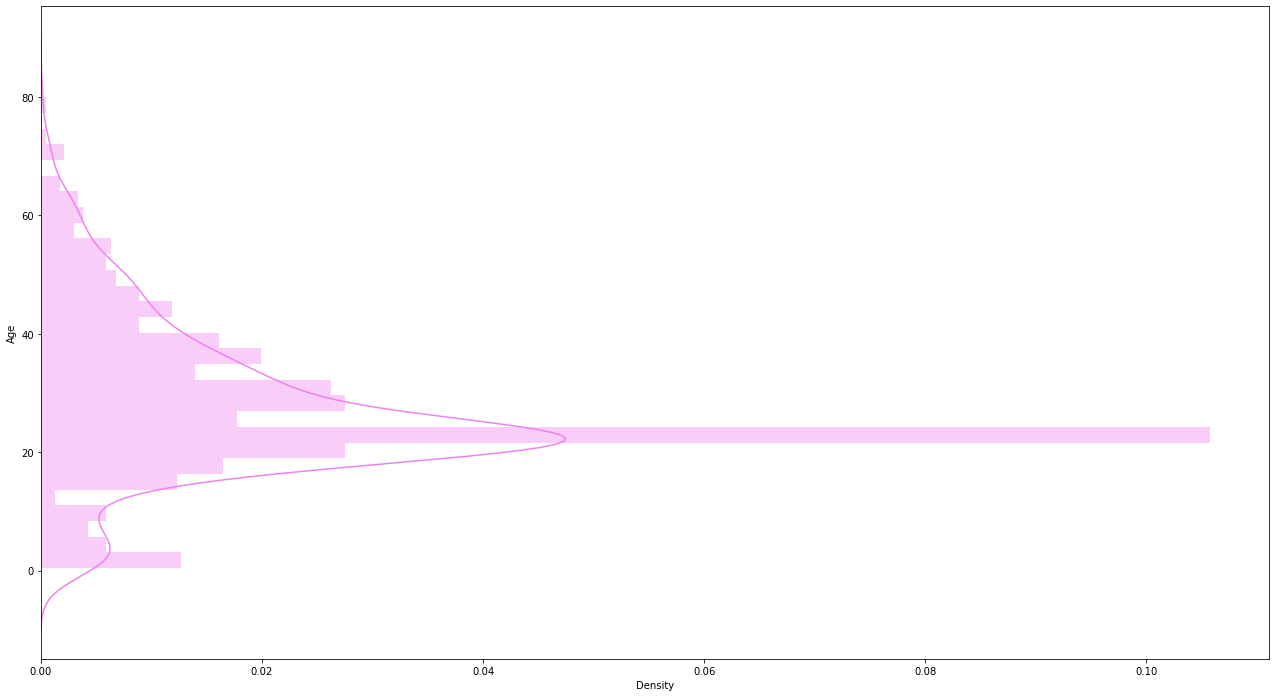

In [99]:
#DISTRIBUTION OF AGE
plt.figure(figsize=(22,12))
sns.distplot(df.Age,kde=True,bins=30,color='Violet',vertical=True)

C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\darsh\anaconda3\lib\site-packages\seaborn\distributions.py:1649: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density', ylabel='Fare'>

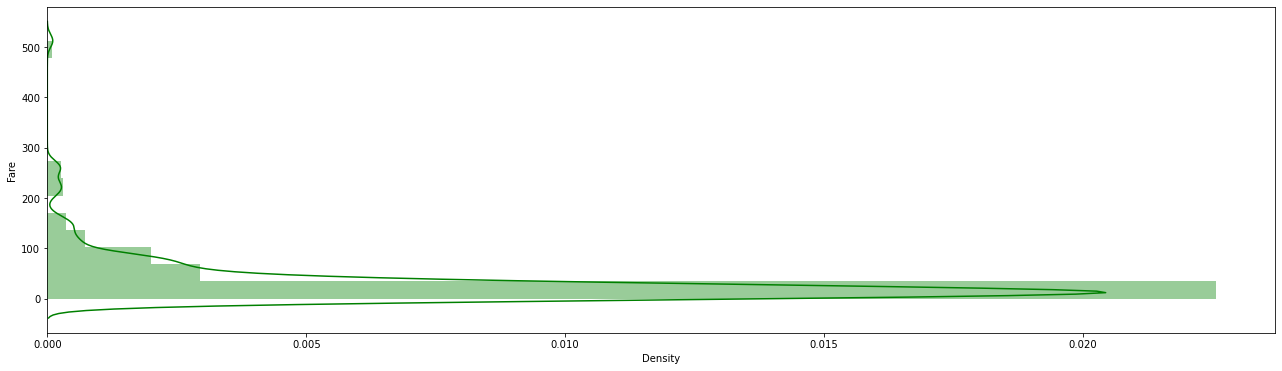

In [98]:
#DISTRIBUTION OF FARE
plt.figure(figsize=(22,6))
sns.distplot(df.Fare,kde=True,vertical=True,bins=15,color='Green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

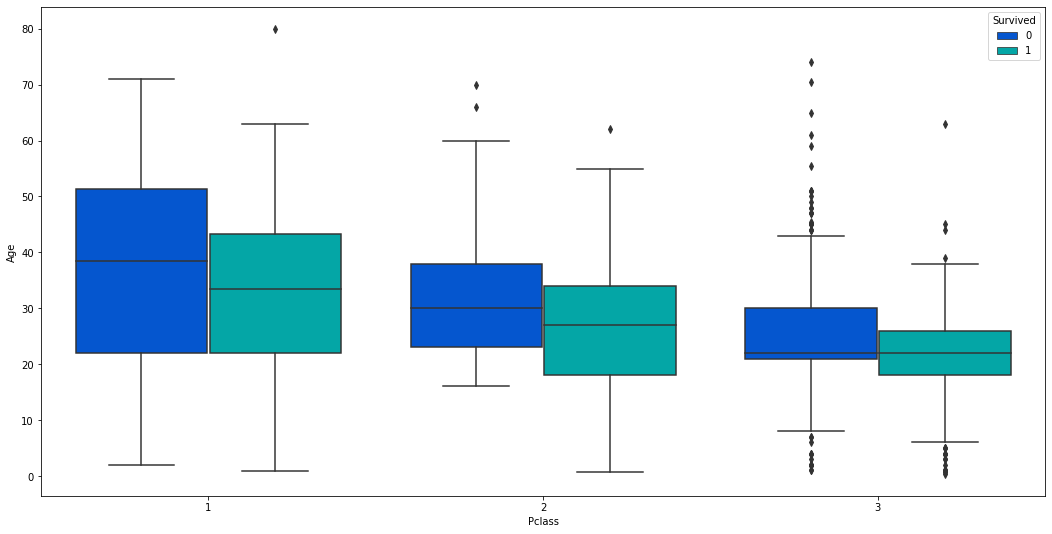

In [93]:
#BOX PLOT OF PCLASS SURVIVED WITH THEIR AGE 
plt.figure(figsize=(18,9))
sns.boxplot(y='Age',x='Pclass',data=df,palette='winter',saturation=0.95,hue='Survived')

In [96]:
#USE GROUP BY TO GET SURVIVAL ON SEX
df[['Survived','Sex']].groupby('Sex', as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,0,0.742038
1,1,0.188908


array([<AxesSubplot:ylabel='Pclass'>, <AxesSubplot:ylabel='Survived'>],
      dtype=object)

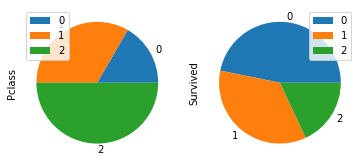

In [85]:
#USE GROUP BY TO GET SURVIVAL ON PCLASS AND PLOT THE PIEPLOT
df[['Survived','Pclass']].groupby('Pclass', as_index=False).mean().sort_values(by='Survived', ascending=False).plot(kind='pie',subplots=True)

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
#SPLIT DATA INTO TRAINING SET AND TESTING SET
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4, 
                                                    random_state=99)

In [88]:
#USING LOGISTIC REGRESSION FOR PREDICTION
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression();
lr.fit(x_train,y_train);
y_pred = lr.predict(x_test);

In [89]:
#CALCULATION OF THE MATRICS
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.23529411764705882
Mean Squared Error: 0.23529411764705882
Root Mean Squared Error: 0.48507125007266594


In [90]:
#PLOT CLASSIFICATION REPORT
from sklearn.metrics import classification_report


In [130]:
print(classification_report(y_test,y_pred.round()))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       230
           1       0.67      0.68      0.67       127

    accuracy                           0.76       357
   macro avg       0.74      0.75      0.74       357
weighted avg       0.77      0.76      0.77       357



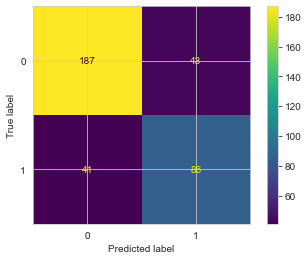

In [132]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(lr, x_test, y_test, cmap='viridis')  
